<a href="https://colab.research.google.com/github/subhanjan160901/Machine-Learning-Practicals/blob/master/Insurance_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
!pip install imbalanced_learn

In [6]:
from google.colab import files 


uploaded = files.upload()

Saving insurance_claims.csv to insurance_claims.csv


In [7]:
import io 

df = pd.read_csv(io.BytesIO(uploaded['insurance_claims.csv'])) 
print(df)

     months_as_customer  age  ...  auto_year fraud_reported
0                   328   48  ...       2004              Y
1                   228   42  ...       2007              Y
2                   134   29  ...       2007              N
3                   256   41  ...       2014              Y
4                   228   44  ...       2009              N
..                  ...  ...  ...        ...            ...
995                   3   38  ...       2006              N
996                 285   41  ...       2015              N
997                 130   34  ...       1996              N
998                 458   62  ...       1998              N
999                 456   60  ...       2007              N

[1000 rows x 39 columns]


In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

**Our model doesn't contain any missing values.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**Data Visualization**

In [11]:
df_hm = df.loc[:,['age','months_as_customer','total_claim_amount','injury_claim','property_claim','vehicle_claim','incident_severity']]
df_hm.head()

,age,months_as_customer,total_claim_amount,injury_claim,property_claim,vehicle_claim,incident_severity
0,48,328,71610,6510,13020,52080,Major Damage
1,42,228,5070,780,780,3510,Minor Damage
2,29,134,34650,7700,3850,23100,Minor Damage
3,41,256,63400,6340,6340,50720,Major Damage
4,44,228,6500,1300,650,4550,Minor Damage


In [12]:
df_hm['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [13]:
l=[]
for i in range(len(df_hm['incident_severity'])):
  if(df_hm['incident_severity'][i]=='Total Loss'):
    l.append(3)
  elif(df_hm['incident_severity'][i]=='Major Damage'):
    l.append(2)
  elif(df_hm['incident_severity'][i]=='Minor Damage'):
    l.append(1)
  else:
    l.append(0)

In [14]:
l=pd.Series(l)
l

0      2
1      1
2      1
3      2
4      1
      ..
995    1
996    2
997    1
998    2
999    1
Length: 1000, dtype: int64

In [ ]:
df_hm['incident_severity_enc']=l
df_hm.drop('encoding', axis=1, inplace=True)
df_hm.head()

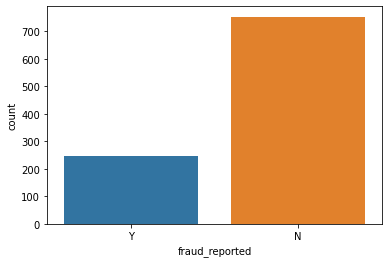

In [16]:
sns.countplot(x=df['fraud_reported'], data=df)

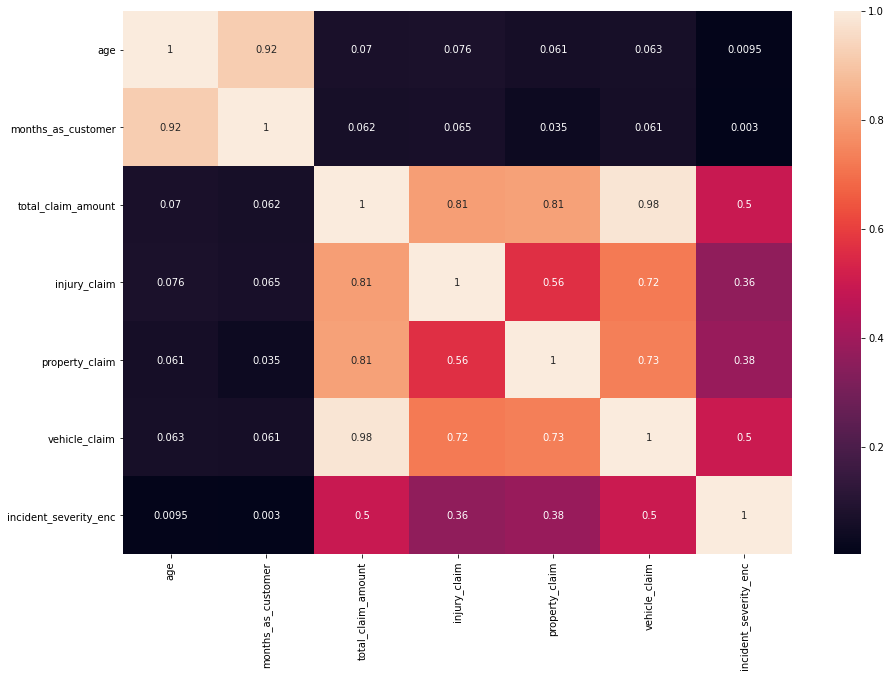

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df_hm.corr(),annot=True)

So as we can see from this heatmap, the correlation values are quite interesting. 'Age' & 'months_as_customer' have a high correlation, which indicates that probably drivers buy auto insurance when they own a car and this time measure only increases with age.
Incident severity and different types of claims have a clear correlation (0.36 to 0.50) which was quite an expected result

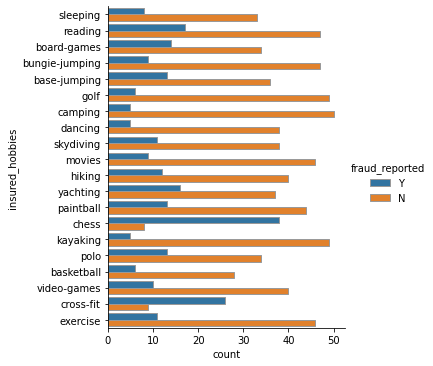

In [18]:
sns.catplot(y="insured_hobbies", hue="fraud_reported", kind="count",
            edgecolor=".6",data=df)

Little have I suspected that fraud differed across hobbies. It seems like chess players and cross-fitters have higher tendencies of fraud. I stopped to think if the sports develop one to be inclined to fraud or that people with tendencies are drawn to it :')

---



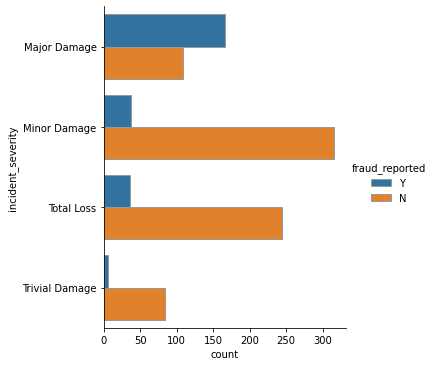

In [19]:
sns.catplot(y="incident_severity", hue="fraud_reported", kind="count",
            edgecolor=".6",data=df)

Major incident severity seems to have highest fraud cases that exceed non fraud cases.

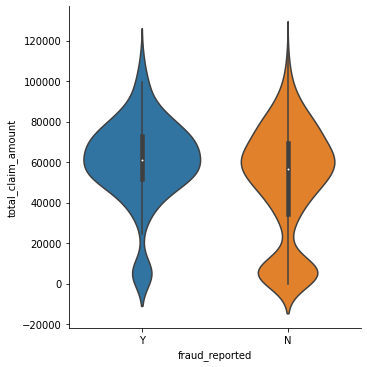

In [20]:
sns.catplot(y="total_claim_amount", x="fraud_reported", kind="violin",
            edgecolor=".6",data=df)

***Pre-processing***

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fraud_reported_enc'] = le.fit_transform(df['fraud_reported'])
df.drop('fraud_reported', axis=1, inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported_enc
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [22]:
df['police_report_available']=df['police_report_available'].replace({'?':np.nan})
df['police_report_available']=df['police_report_available'].fillna(method='ffill')

In [23]:
df['collision_type']=df['collision_type'].replace({'?':np.nan})
df['collision_type']=df['collision_type'].fillna(method='ffill')

In [24]:
df['property_damage']=df['property_damage'].replace({'?':np.nan})
df['property_damage']=df['property_damage'].fillna(method='ffill')

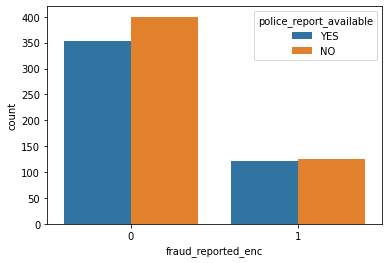

In [25]:
sns.countplot(x=df['fraud_reported_enc'],hue='police_report_available',data=df)

In [36]:
#lets drop the unnecessary feature. Before that make a copy of df=df2
df2=df
df2=df2.drop(['months_as_customer','policy_number','policy_bind_date','policy_csl','auto_year','auto_model','insured_hobbies','insured_zip','incident_date'],axis=1)

In [37]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported_enc
0,328,48,521585,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,2,1,4,5,5,628,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


In [38]:
df.shape

(1000, 39)

In [39]:
df2.head()

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported_enc
0,48,2,1000,1406.91,0,1,4,2,0,53300,0,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1
1,42,1,2000,1197.22,5000000,1,4,6,2,0,0,3,2,1,4,5,5,628,8,1,1,0,0,1,5070,780,780,3510,8,1
2,29,2,2000,1413.14,5000000,0,6,11,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,0
3,41,0,2000,1415.74,6000000,0,6,1,4,48900,-62400,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,1
4,44,0,1000,1583.91,6000000,1,0,11,4,66000,-46000,3,0,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,0


In [40]:
df2.shape

(1000, 30)

In [41]:
#now deal with the categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df2.columns):
    if df2[i].dtype=='object':
        df2[i]=le.fit_transform(df2[i])

In [42]:
df2.head()

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported_enc
0,48,2,1000,1406.91,0,1,4,2,0,53300,0,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1
1,42,1,2000,1197.22,5000000,1,4,6,2,0,0,3,2,1,4,5,5,628,8,1,1,0,0,1,5070,780,780,3510,8,1
2,29,2,2000,1413.14,5000000,0,6,11,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,0
3,41,0,2000,1415.74,6000000,0,6,1,4,48900,-62400,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,1
4,44,0,1000,1583.91,6000000,1,0,11,4,66000,-46000,3,0,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,0


In [69]:
y=df2['fraud_reported_enc']
x=df2.drop(['fraud_reported_enc'],axis=1)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [121]:
sm = SMOTE(random_state=1)
x_upsample, y_upsample  = sm.fit_sample(X_train, y_train)
x_test_upsample, y_test_upsample  = sm.fit_sample(X_test, y_test)
x,y = sm.fit_sample(X_train, y_train)
print(x.shape)
print(x_upsample.shape)
print(y_upsample.shape)

(1060, 29)
(1060, 29)
(1060,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [123]:
print("After SMOTE , counts of label '1' in y_upsample: {}".format(sum(y_upsample == 1))) 
print("After SMOTE , counts of label '0' in y_upsample: {}".format(sum(y_upsample == 0)))
print("After SMOTE , counts of label '1' in y: {}".format(sum(y == 1))) 
print("After SMOTE , counts of label '0' in y: {}".format(sum(y == 0)))
print("After SMOTE , counts of label '1' in y_test_upsample: {}".format(sum(y_test_upsample == 1))) 
print("After SMOTE , counts of label '0' in y_test_upsample: {}".format(sum(y_test_upsample == 0)))

After SMOTE , counts of label '1' in y_upsample: 530
After SMOTE , counts of label '0' in y_upsample: 530
After SMOTE , counts of label '1' in y: 530
After SMOTE , counts of label '0' in y: 530
After SMOTE , counts of label '1' in y_test_upsample: 223
After SMOTE , counts of label '0' in y_test_upsample: 223


In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_upsample_scale=sc.fit_transform(x_upsample)
x_scale = sc.fit_transform(x)

**Random forest classifier**

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [113]:
#Hyperparamenter tuning
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,30)}

In [114]:
grid=GridSearchCV(rf,parameters, cv=10)

In [117]:
grid.fit(x_scale, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [118]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 23}

In [119]:
grid.best_score_

0.8783018867924527

**Logistic regression**

In [120]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(Cs=[1e-1, 0.02, 0.5,1], cv=10)
lr.fit(x_upsample_scale,y_upsample)

LogisticRegressionCV(Cs=[0.1, 0.02, 0.5, 1], class_weight=None, cv=10,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [124]:
y_pred_lr = lr.predict(x_test_upsample)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_upsample,y_pred_lr)

0.5

**XGBoost**

In [129]:
param_test1 = {
 'max_depth':range(3,10),
 'min_child_weight':range(1,6)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_scale,y)
gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 9, 'min_child_weight': 1}, 0.9399786400854397)